In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
path = "../data/regression/data_2div.csv"
data = pd.read_csv(path, header=None, names=['Times','Scores'])
data.head()

,Times,Scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
data.describe() # 看看数据长什么样

,Times,Scores
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


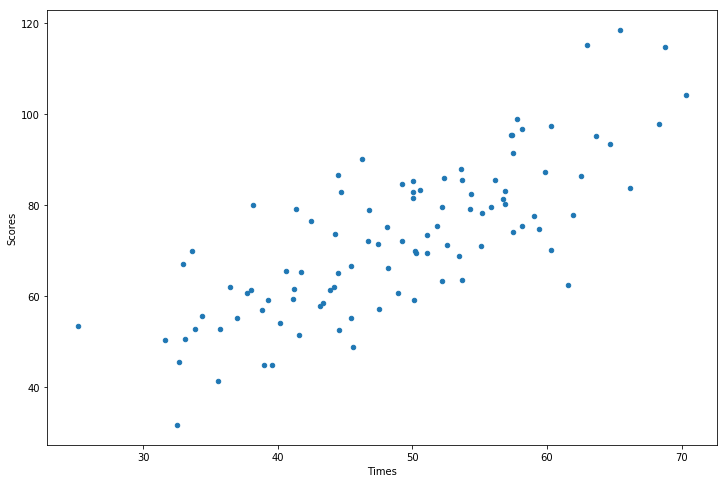

In [4]:
# scatter表示散点图， figsize表示画布大小
data.plot(kind='scatter', x='Times', y='Scores',figsize=(12, 8))

In [5]:
def computeCost(X, y, theta):
    # 通过矩阵的形式来计算，X和Y表示向量，theta表示系数向量
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [6]:
# data类型是一个DataFrame
type(data)

pandas.core.frame.DataFrame

In [7]:
# 让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度
# 因为 Y = X *theta.T , theta的长度为n+1， 因此需要在X中添加一项常数项
data.insert(0, 'Ones', 1)

In [8]:
data.describe()

,Ones,Times,Scores
count,100.0,100.000000,100.000000
mean,1.0,48.958341,72.735051
std,0.0,9.746379,16.658187
min,1.0,25.128485,31.707006
25%,1.0,41.526164,60.788586
50%,1.0,49.634970,72.179542
75%,1.0,56.762631,83.215080
max,1.0,70.346076,118.591217


In [9]:
cols = data.shape[1]
print(type(cols))
print(cols)

<class 'int'>
3


In [10]:
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

In [11]:
X.head()

,Ones,Times
0,1,32.502345
1,1,53.426804
2,1,61.530358
3,1,47.475640
4,1,59.813208


In [12]:
y.head()

,Scores
0,31.707006
1,68.777596
2,62.562382
3,71.546632
4,87.230925


In [13]:
# 代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))  # 初始化theta为 [[0,0]] 是一个（1，2）的矩阵

In [14]:
# print(X)

In [15]:
theta

matrix([[0, 0]])

In [16]:
X.shape, theta.shape, y.shape

((100, 2), (1, 2), (100, 1))

In [17]:
# 初始损失函数的值
computeCost(X, y, theta)

2782.553917241607

In [18]:
#temp = np.matrix(np.array([1,2])) 
#temp1 = np.matrix(np.zeros(temp.shape))
#temp1
#ravel = temp.ravel().shape[1]
#ravel
# print(np.zeros(100))
# temp = np.array([[1, 3, 4]])
# # 求和
# np.sum(temp)
# temp1 = np.array([[1],[3],[4]])
# reTemp = np.multiply(temp1, temp)
# print(temp.shape)
# print(temp1.shape)
# print(reTemp.shape)

### batch gradient decent（批量梯度下降）
    

In [19]:
def gradientDescent(X, y, theta, alpha, iters):
    # 生成一个和theta维度相同的0矩阵
    temp = np.matrix(np.zeros(theta.shape))
    # 查看theta有多少参数
    parameters = int(theta.ravel().shape[1])
    # 迭代次数的零矩阵
    cost = np.zeros(iters)
    
    for i in range(iters):
        
        # 残差值向量
        error = (X * theta.T) - y
        #print(error)
        #print("====================")
        for j in range(parameters):
            
            # 计算梯度的中间过程，即(theta * x - y) * x的过程，得到求和的主体
            # 接下来用np.sum(term)进行计算梯度 同时还要除以整个数据的长度
            term = np.multiply(error, X[:,j])
            #print(term)
            # 将梯度存入temp中，得到的temp为梯度矩阵 alpha /x的长度表示步长 
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        # 每一轮迭代完将theta更新   
        theta = temp
        # 计算每一轮迭代损失函数的值
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost 

In [20]:
alpha = 0.00001 # alpha的值设置很重要，因为可能会跳过最优解，导致损失值越来越大
iters = 200

In [21]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[0.0294818 , 1.46940155]])

In [22]:
# 得到的g即为theta的值，cost为损失函数迭代次数的累计
computeCost(X, y, g)

56.43782008635913

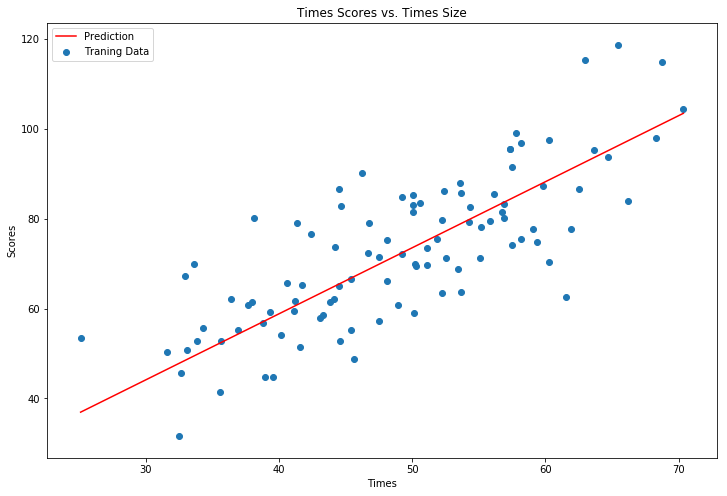

In [23]:
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# num生成的样本数，默认是50。必须是非负。
x = np.linspace(data.Times.min(), data.Times.max(), 100)
# 预测函数 y = theta * X
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(sharey=True, figsize=(12,8))
# fig： matplotlib.figure.Figure 对象
# ax：子图对象（ matplotlib.axes.Axes）或者是他的数组
# 预测值的图例为Prediction 颜色为red
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Times, data.Scores, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Times')
ax.set_ylabel('Scores')
ax.set_title('Times Scores vs. Times Size')

plt.show()

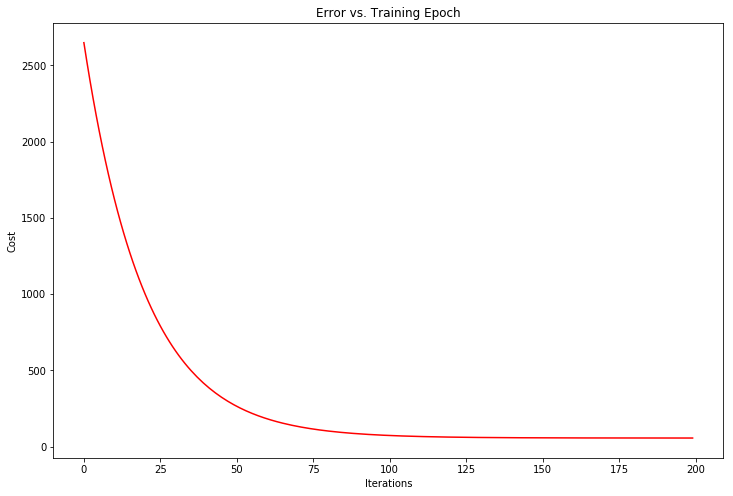

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### 多变量回归

In [25]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [26]:
# (x - x_bar) / 标准差  特征归一
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#### 现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [27]:
# 添加一列，成为n+1
data2.insert(0, 'Ones', 1)

# 生成X和y的矩阵和向量
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# 将X和y转化为np中的矩阵，便于计算
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
# 初始化theta
theta2 = np.matrix(np.array([0,0,0]))

alpha2 = 0.01
iters2 = 1000

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha2, iters2)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

In [34]:
g2

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

#### 查看过程中的损失函数的变化

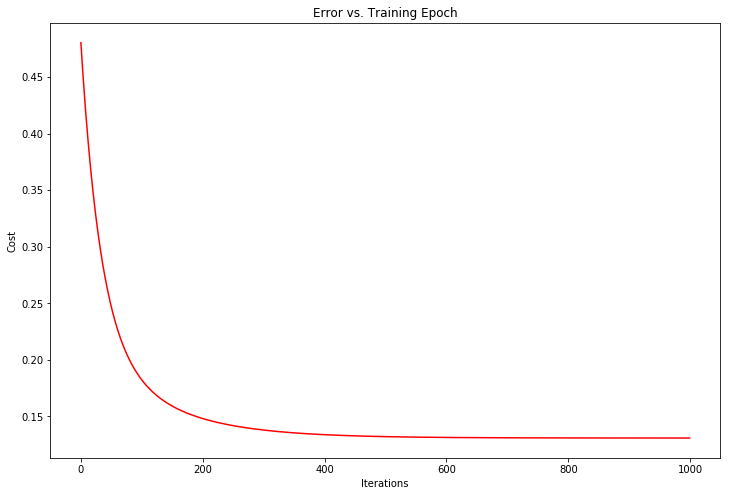

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters2), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

#### 我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [31]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

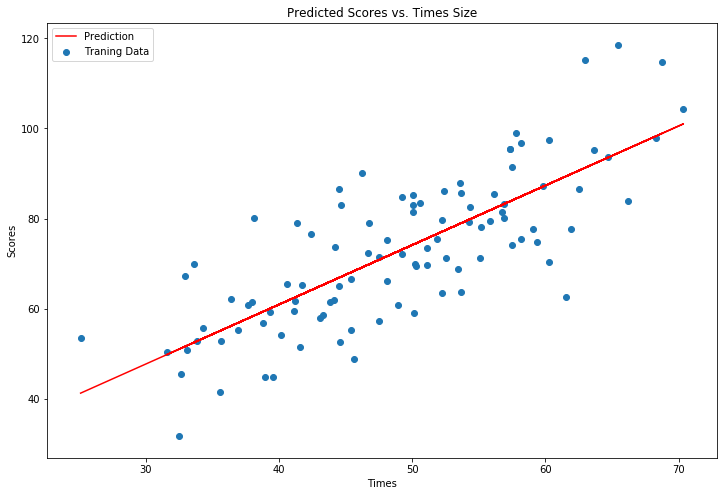

In [32]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Times, data.Scores, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Times')
ax.set_ylabel('Scores')
ax.set_title('Predicted Scores vs. Times Size')
plt.show()

### normal equation（正规方程）

 $$\theta = (X^T X)^{-1} X^T y$$中由于$$X^T X$$是方阵，
 可以求逆矩阵，因此用此需要计算$$(X^T X)^{-1}$$
 来得到 $$\theta$$的值

In [36]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [38]:
final_theta2=normalEqn(X2, y2)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-1.04083409e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

In [ ]:
#梯度下降得到的结果是matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])